In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("../Datasets/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:>

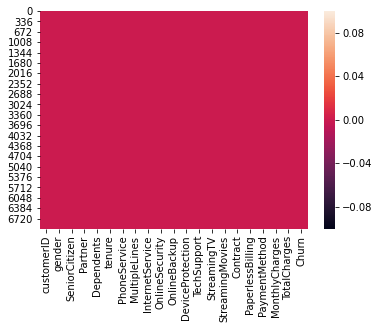

In [3]:
sns.heatmap(df.isna())
# df.isnull().sum()

<AxesSubplot:xlabel='Churn', ylabel='count'>

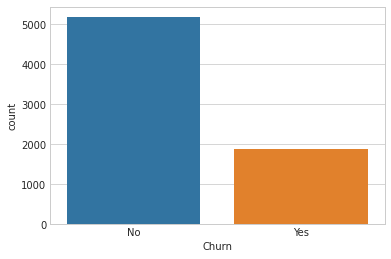

In [4]:
sns.set_style("whitegrid")
sns.countplot(x="Churn",data=df)

In [6]:
# for i in df.columns:
#     if df[i].dtypes=="O":
#         sns.countplot(x="Churn",data=df,hue=i)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<AxesSubplot:>

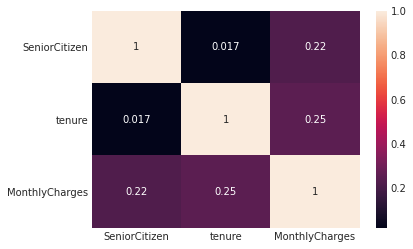

In [44]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

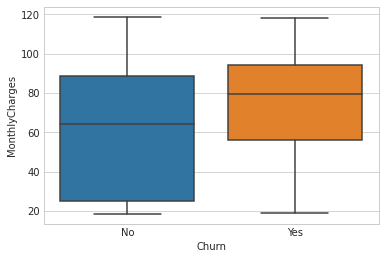

In [45]:
sns.boxplot(x="Churn",y="MonthlyCharges",data=df)

In [46]:
df.drop(["customerID"],inplace=True,axis=1)

In [34]:
#get dummies value of all categories variable
all_dummies=[]
object_cols=[]
for col in df.columns:
    if df[col].dtype=="O":
        col_dummies=pd.get_dummies(df[col],drop_first=True)
        object_cols.append(col)
        all_dummies.append(col_dummies)
    

In [55]:
all_dummies[-2]

,Yes
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [36]:
df.drop(object_cols,axis=1,inplace=True)

,Male,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,Yes,...,997.65,997.75,998.1,999.45,999.8,999.9,Yes,SeniorCitizen,tenure,MonthlyCharges
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,29.85
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,34,56.95
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,2,53.85
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,45,42.30
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,2,70.70
